# Heat equation in 1D

We consider the following problem:
$$
\left\{
\begin{aligned} 
u_t(x,t) - u_{xx}(x,t) &= f(x,t) \;  &\quad \text{in } \Omega = (0,1)^2 \\
u(0,t) = u(1,t) &= 0 \;  &\quad \text{for } t \in (0,1) \\
u(x,0) &= u_0(x) \; &\quad \text{for } x \in (0,1)
\end{aligned}
\right.
$$

In particular, we want to solve the problem numerically with
$$
f(x,t) = 0
$$
and
$$
u_0(x) = 
\begin{cases}
2x \; , & x \in \left[0, \frac 1 2\right] \\
2(1-x) \; , & x \in \left[\frac 1 2 , 0 \right]
\end{cases}
$$

In [1]:
function heat_1d_fd_explicit(f, u0, dx, dt, tEnd)
    n = convert(Int, 1/dx)
    xvec = collect(range(0, stop=1, length=n+1))
    v = similar(xvec)
    for (i, x) in enumerate(xvec)
        v[i] = u0(x)
    end
    
    nIterations = round(tEnd / dt)
    r = dt/(dx^2)
    for m = 1:nIterations
        vp = copy(v)
        v[1] = 0
        v[end] = 0
        for (i, x) in enumerate(xvec)
            if i == 1 || i == length(xvec)
                continue
            end
            v[i] = r*vp[i+1] + (1-2r)*vp[i] + r*vp[i-1] + 1/r*f(x, (m-1)*dt)
        end
    end
    return v
end

heat_1d_fd_explicit (generic function with 1 method)

In [2]:
f(x,t) = 0

f (generic function with 1 method)

In [3]:
u0(x) = (x <= 0.5) ? 2x : 2(1-x)

u0 (generic function with 1 method)

In [4]:
v = heat_1d_fd_explicit(f, u0, 0.02, 0.0002, 0.1);

In [5]:
using PyPlot
function plot_numerical_solution(u)
    x = collect(range(0, stop=1, length=51))
    plot(x, u, "--")
    xlabel("x")
    #title(string("Exact and numerical solution for h = ", h))
    #legend(("exact", "numerical"))
end

plot_numerical_solution (generic function with 1 method)

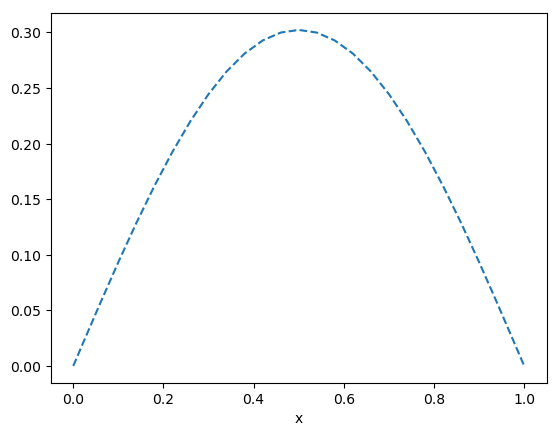

PyObject Text(0.5, 24.0, 'x')

In [6]:
plot_numerical_solution(v)

In [7]:
v = heat_1d_fd_explicit(f, u0, 0.02, 0.000201, 0.1);

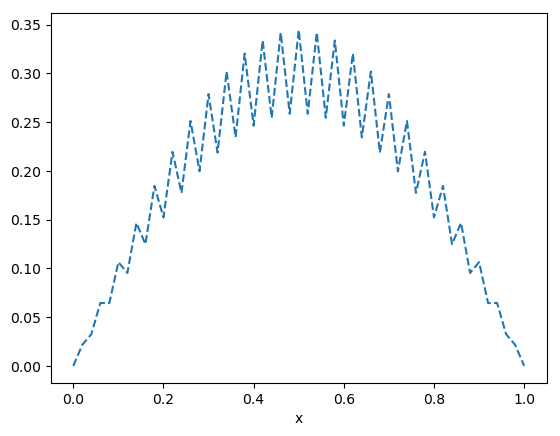

PyObject Text(0.5, 24.0, 'x')

In [8]:
plot_numerical_solution(v)

In [9]:
using SparseArrays
function heat_1d_fd_implicit(f, u0, dx, dt, tEnd)
    n = convert(Int, 1/dx)
    xvec = collect(range(0, stop=1, length=n+1))
    v = similar(xvec)
    for (i, x) in enumerate(xvec)
        v[i] = u0(x)
    end
    
    nIterations = round(tEnd / dt)
    r = dt/(dx^2)
    
    mdiag = (2r+1)*ones(n-1)
    ldiag = -r*ones(n-2)
    udiag = -r*ones(n-2)
    M = spdiagm(-1 => ldiag, 0 => mdiag, 1 => udiag)
    
    v[1] = v[end] = 0
    for m = 1:nIterations
        vp = copy(v)
        rhs = v[2:end-1]
        for (i, x) in enumerate(xvec)
            if i == 1 || i == length(xvec)
                continue
            end
            rhs[i-1] += dt*f(x, m*dt)
        end
        v[2:end-1] = M \ rhs
            
        #v[1] = 0
        #v[end] = 0
        #for (i, x) in enumerate(xvec)
        #    if i == 1 || i == length(xvec)
        #        continue
        #    end
        #    v[i] = r*vp[i+1] + (1-2r)*vp[i] + r*vp[i-1] + 1/r*f(x, (m-1)*dt)
        #end
        
    end
    return v
end

heat_1d_fd_implicit (generic function with 1 method)

In [ ]:
v = heat_1d_fd_implicit(f, u0, 0.02, 0.0002, 0.1)

In [ ]:
plot_numerical_solution(v)

In [ ]:
v = heat_1d_fd_implicit(f, u0, 0.02, 0.000201, 0.1)

In [ ]:
plot_numerical_solution(v)